In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("H:\\selected project\\numerical\\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [10]:
df.shape

(200, 6)

In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [13]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [15]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [16]:
df.groupby('Drug').mean()

,Age,Na_to_K
Drug,,
DrugY,43.747253,22.374780
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556


In [17]:
df.nunique()


Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [18]:
print(df['Sex'].nunique())
df['Sex'].value_counts()

2


M    104
F     96
Name: Sex, dtype: int64

In [19]:
print(df['BP'].nunique())
df['BP'].value_counts()


3


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [20]:
print(df['Cholesterol'].nunique())
df['Cholesterol'].value_counts()


2


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [21]:
print(df['Drug'].nunique())
df['Drug'].value_counts()


5


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [22]:
print(df['Na_to_K'].nunique())
df['Na_to_K'].value_counts()

198


12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64

In [23]:
print(df['Age'].nunique())
df['Age'].value_counts()


57


47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [24]:

df.Sex = df.Sex.map({'M':1,'F':2}) 
df.BP = df.BP.map({'HIGH':2,'NORMAL':1,'LOW':0})
df.Cholesterol = df.Cholesterol.map({'HIGH':1,'NORMAL':0})
df.Drug = df.Drug.map({'DrugY':1,'drugX':2 ,'drugA':3 , 'drugC':4,'drugB':5 })
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,1,25.355,1
1,47,1,0,1,13.093,4
2,47,1,0,1,10.114,4
3,28,2,1,1,7.798,2
4,61,2,0,1,18.043,1


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Sex,200.0,1.480000,0.500854,1.000,1.0000,1.0000,2.00,2.000
BP,200.0,1.065000,0.839224,0.000,0.0000,1.0000,2.00,2.000
Cholesterol,200.0,0.515000,0.501029,0.000,0.0000,1.0000,1.00,1.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200.0,2.060000,1.270619,1.000,1.0000,2.0000,3.00,5.000


In [26]:
cor = df.corr()
cor
#every column and its relation

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,0.160692
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,-0.092860
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,0.142413
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,0.116981
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,-0.593746
Drug,0.160692,-0.092860,0.142413,0.116981,-0.593746,1.000000


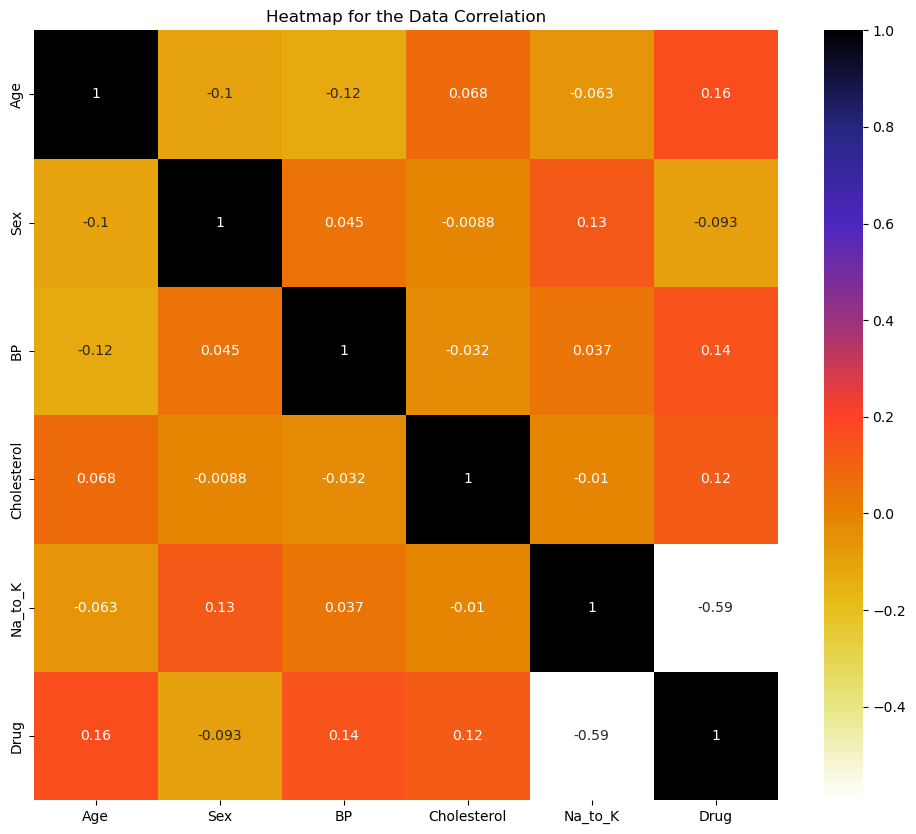

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.title('Heatmap for the Data Correlation')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis = 1)
y = df.Drug

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 45, stratify=y)

In [29]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

In [30]:
from sklearn import tree

tr = tree.DecisionTreeClassifier(random_state = 45)
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
y_pred


array([5, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 5,
       2, 1, 1, 1, 2, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 5, 4,
       2, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

tr_acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ', tr_acc)


accuracy_score :  0.9833333333333333


In [32]:
tr_train_score = tr.score(X_train, y_train)

tr_test_score= tr.score(X_test, y_test)


print('Decision Tree Classifier Train Score is : ' , tr_train_score)

print('Decision Tree Classifier Test Score is : ' , tr_test_score)from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


Decision Tree Classifier Train Score is :  1.0
Decision Tree Classifier Test Score is :  0.9833333333333333


In [33]:
from sklearn import  metrics

tr_acc = 100*tr.score(X_test, y_test)
print('Decision Tree Classifier Predictions: \n', tr.predict(X_test), '\n Accuracy:', tr_acc, '%')

Decision Tree Classifier Predictions: 
 [5 1 1 1 2 1 1 4 2 2 1 2 3 1 1 1 3 2 1 1 2 5 2 1 1 1 2 2 3 4 1 1 1 1 1 1 1
 1 1 3 3 1 5 4 2 4 2 2 3 2 2 2 1 5 3 5 4 1 1 1] 
 Accuracy: 98.33333333333333 %


In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        27
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[27  0  0  0  0]
 [ 1 15  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  5]]


In [36]:
X_test.iloc[50]

Age            23.00
Sex             1.00
BP              1.00
Cholesterol     0.00
Na_to_K        14.02
Name: 198, dtype: float64

In [37]:
tr.predict([X_test.iloc[50]])

array([2], dtype=int64)

In [38]:
X_test.iloc[38]

Age            58.000
Sex             2.000
BP              2.000
Cholesterol     1.000
Na_to_K        19.416
Name: 50, dtype: float64

In [39]:
    tr.predict([X_test.iloc[38]])

array([1], dtype=int64)

In [40]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
cross_check


,Actual,Predicted
41,5,5
126,1,1
185,1,1
133,1,1
45,2,2
121,1,1
168,1,1
1,4,4
146,2,2
113,2,2


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_features = 5, random_state = 45)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([5, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 2, 5,
       2, 1, 1, 1, 2, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 5, 4,
       2, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 1, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", rf_acc)

accuracy_score:  0.9833333333333333


In [43]:
rf_train_score = rf.score(X_train, y_train)

rf_test_score= rf.score(X_test, y_test)


print('Random Forest Classifier Train Score is : ' , rf_train_score)

print('Random Forest Classifier Test Score is : ' , rf_test_score)


Random Forest Classifier Train Score is :  1.0
Random Forest Classifier Test Score is :  0.9833333333333333


In [44]:
from sklearn import  metrics

rf_acc = 100*rf.score(X_test, y_test)
print('Random Forest Classifier Predictions : \n', rf.predict(X_test), '\n Accuracy:', rf_acc, '%')

Random Forest Classifier Predictions : 
 [5 1 1 1 2 1 1 4 2 2 1 2 3 1 1 1 3 2 1 1 2 5 2 1 1 1 2 2 3 4 1 1 1 1 1 1 1
 1 1 3 3 1 5 4 2 4 2 2 3 2 2 2 1 5 3 5 4 1 1 1] 
 Accuracy: 98.33333333333333 %


In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        27
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[27  0  0  0  0]
 [ 1 15  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  5]]


In [48]:
X_test.iloc[45]

Age            47.000
Sex             2.000
BP              0.000
Cholesterol     1.000
Na_to_K        11.767
Name: 10, dtype: float64

In [49]:
rf.predict([X_test.iloc[45]])


array([4], dtype=int64)

In [50]:
X_test.iloc[33]

Age            33.000
Sex             2.000
BP              0.000
Cholesterol     1.000
Na_to_K        33.486
Name: 24, dtype: float64

In [51]:
rf.predict([X_test.iloc[33]])


array([1], dtype=int64)

In [52]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
cross_check


,Actual,Predicted
41,5,5
126,1,1
185,1,1
133,1,1
45,2,2
121,1,1
168,1,1
1,4,4
146,2,2
113,2,2


In [53]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred


array([5, 5, 1, 1, 2, 3, 1, 4, 2, 2, 3, 2, 3, 4, 1, 1, 3, 2, 3, 1, 2, 5,
       2, 1, 1, 3, 2, 2, 3, 4, 4, 1, 5, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 4,
       1, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 1, 1, 4], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score

gnb_acc = accuracy_score(y_test, y_pred)
print("accuracy_score: ", gnb_acc)

accuracy_score:  0.8


In [55]:

gnb_train_score = gnb.score(X_train, y_train)

gnb_test_score= gnb.score(X_test, y_test)

print('Naive Bayes Train Score is : ' , gnb_train_score)

print('Naive Bayes Test Score is : ' , gnb_test_score)


Naive Bayes Train Score is :  0.8785714285714286
Naive Bayes Test Score is :  0.8


In [56]:
gnb_acc = 100*gnb.score(X_test, y_test)
print('Naive Bayes Predictions : \n', gnb.predict(X_test), '\n Accuracy:', gnb_acc, '%')


Naive Bayes Predictions : 
 [5 5 1 1 2 3 1 4 2 2 3 2 3 4 1 1 3 2 3 1 2 5 2 1 1 3 2 2 3 4 4 1 5 1 1 1 1
 1 1 3 3 3 5 4 1 4 2 2 3 2 2 2 1 5 3 5 4 1 1 4] 
 Accuracy: 80.0 %


In [57]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.89      0.63      0.74        27
           2       1.00      0.88      0.93        16
           3       0.58      1.00      0.74         7
           4       0.62      1.00      0.77         5
           5       0.71      1.00      0.83         5

    accuracy                           0.80        60
   macro avg       0.76      0.90      0.80        60
weighted avg       0.85      0.80      0.80        60



In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[17  0  5  3  2]
 [ 2 14  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  5]]


In [59]:
X_test.iloc[15]

Age            47.000
Sex             1.000
BP              0.000
Cholesterol     0.000
Na_to_K        30.568
Name: 22, dtype: float64

In [60]:
gnb.predict([X_test.iloc[15]])

array([1], dtype=int64)

In [61]:
X_test.iloc[20]

Age            49.000
Sex             1.000
BP              0.000
Cholesterol     0.000
Na_to_K        11.014
Name: 32, dtype: float64

In [62]:
gnb.predict([X_test.iloc[20]])


array([2], dtype=int64)

In [63]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
cross_check


,Actual,Predicted
41,5,5
126,1,5
185,1,1
133,1,1
45,2,2
121,1,3
168,1,1
1,4,4
146,2,2
113,2,2


In [64]:
from sklearn import preprocessing
from sklearn.svm import SVC

svm = SVC(kernel ='linear')
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred

array([1, 1, 1, 1, 2, 1, 1, 4, 2, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 2, 5,
       2, 1, 1, 1, 2, 2, 3, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 4,
       1, 4, 2, 2, 3, 2, 2, 2, 1, 5, 3, 5, 4, 1, 1, 1], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

svm_acc = accuracy_score(y_test, y_pred)
print('accuracy_score: ', svm_acc)


accuracy_score:  0.9


In [66]:
svm_train_score = svm.score(X_train, y_train)

svm_test_score= svm.score(X_test, y_test)

print('Support Vector Machine Train Score is : ' , svm_train_score)

print('Support Vector Machine Test Score is : ' , svm_test_score)


Support Vector Machine Train Score is :  0.9857142857142858
Support Vector Machine Test Score is :  0.9


In [68]:
from sklearn import  metrics

svm_acc = 100*svm.score(X_test, y_test)
print('Support Vector Machine Predictions : \n', svm.predict(X_test), '\n Accuracy:', svm_acc, '%')


Support Vector Machine Predictions : 
 [1 1 1 1 2 1 1 4 2 2 1 2 3 1 1 1 3 1 1 1 2 5 2 1 1 1 2 2 3 4 1 1 5 1 1 1 1
 1 1 3 3 1 3 4 1 4 2 2 3 2 2 2 1 5 3 5 4 1 1 1] 
 Accuracy: 90.0 %


In [69]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.87      0.96      0.91        27
           2       1.00      0.81      0.90        16
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00         5
           5       0.75      0.60      0.67         5

    accuracy                           0.90        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60



In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[26  0  0  0  1]
 [ 3 13  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  5  0]
 [ 1  0  1  0  3]]


In [71]:
New_Patient = [[68, 1, 2, 1, 25.355]]
svm.predict(New_Patient)

array([1], dtype=int64)

In [72]:
New_Patient = [[47, 2, 0, 1, 13.093]]
svm.predict(New_Patient)

array([1], dtype=int64)

In [74]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
cross_check

,Actual,Predicted
41,5,1
126,1,1
185,1,1
133,1,1
45,2,2
121,1,1
168,1,1
1,4,4
146,2,2
113,2,2


In [75]:
pd.DataFrame(data={'Model': ['Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes', 'Support Vector Machine (SVM)'], 'Accuracy %': [tr_acc, rf_acc, gnb_acc, svm_acc]})


,Model,Accuracy %
0,Decision Tree Classifier,98.333333
1,Random Forest Classifier,98.333333
2,Naive Bayes,80.000000
3,Support Vector Machine (SVM),90.000000


Text(0.5, 1.03, 'Model Comparison - Model Accuracy')

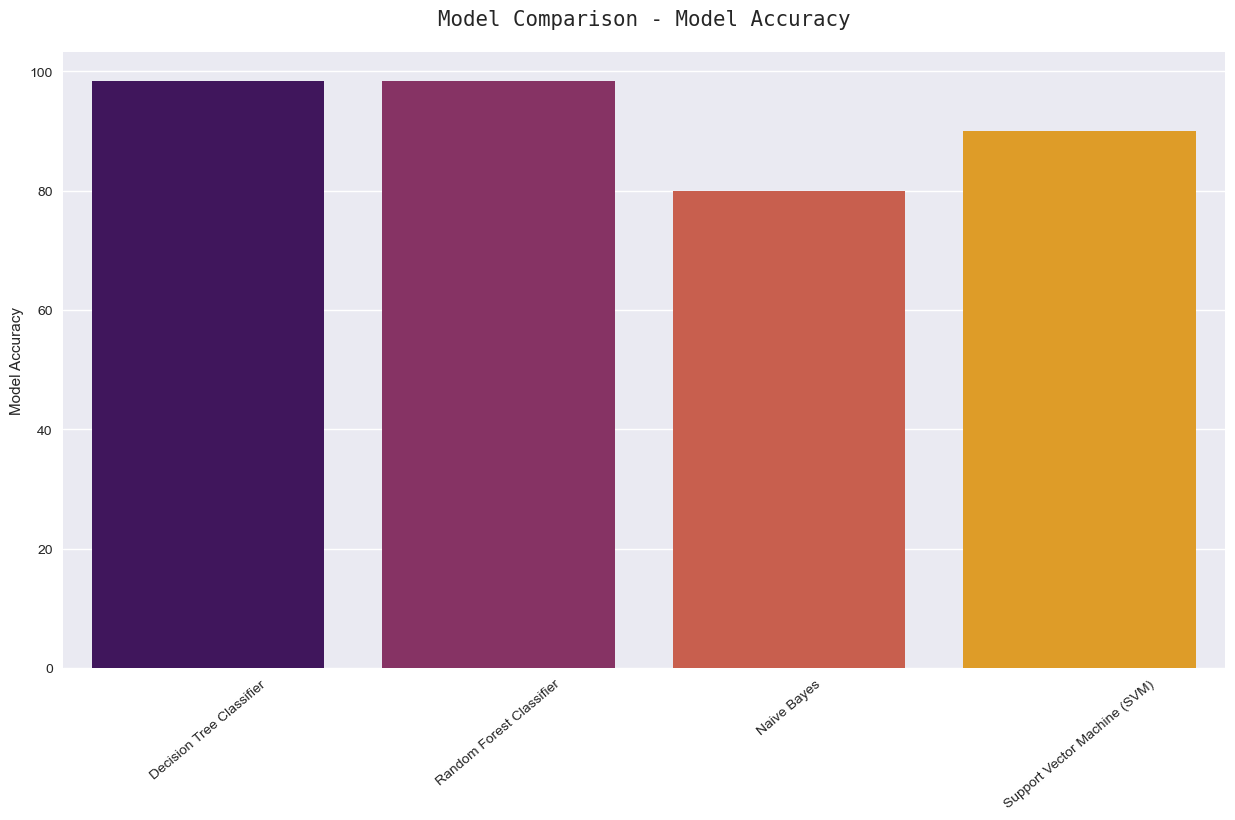

In [76]:
plt.style.use("seaborn")

x = ['Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes','Support Vector Machine (SVM)']

y = [tr_acc, rf_acc, gnb_acc, svm_acc]

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x,y=y, palette='inferno')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=40)
plt.title('Model Comparison - Model Accuracy', fontsize=15, fontname='monospace', y=1.03)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [81]:
sensitivity = recall_score(y_test , y_pred , average = 'macro')
specificity = recall_score(np.logical_not(y_test) , np.logical_not(y_pred) , average = 'macro')

In [82]:
print("Specificity : ",specificity)
print("Sensitivity : ",sensitivity)

Specificity :  1.0
Sensitivity :  0.8750925925925925


In [83]:
print("Precision Score :",precision_score(y_test, y_pred, average='macro')) 

Precision Score : 0.8983333333333334


In [84]:
print("Recall Score :",recall_score(y_test, y_pred, average='macro')) 

Recall Score : 0.8750925925925925


In [85]:
cm = multilabel_confusion_matrix(y_test, y_pred)
print("Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix : [[[29  4]
  [ 1 26]]

 [[44  0]
  [ 3 13]]

 [[52  1]
  [ 0  7]]

 [[55  0]
  [ 0  5]]

 [[54  1]
  [ 2  3]]]

True Positives(TP) =  [29  4]

True Negatives(TN) =  [ 3 13]

False Positives(FP) =  [ 1 26]

False Negatives(FN) =  [44  0]


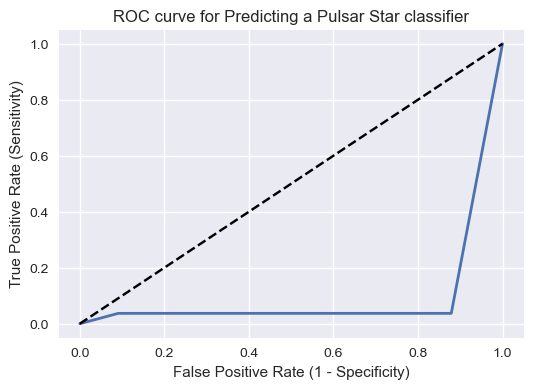

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred ,pos_label=1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()